<a href="https://colab.research.google.com/github/ansegundo/flight_ticket_price/blob/master/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
#mounting google drive to access data

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import datetime

plt.style.use('fivethirtyeight')
sns.set_style("whitegrid")
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [0]:
df_train = pd.read_excel('/content/gdrive/My Drive/Colab Notebooks/flight_ticket_price/data/final_train.xlsx')
df_test = pd.read_excel('/content/gdrive/My Drive/Colab Notebooks/flight_ticket_price/data/final_test.xlsx')

In [60]:
print(df_train.shape)
print(df_test.shape)

(10462, 16)
(2671, 15)


In [61]:
df_train.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Day,DayName,Month,isWeekend,Duration_minutes,Dep_time_Hour,Dep_time_Min,Arrival_Time_Hour,Arrival_Time_Min,LogPrice
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,24,Sunday,3,1,170,22,20,1,10,8.268219
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,1,Wednesday,5,0,445,5,50,13,15,8.944159


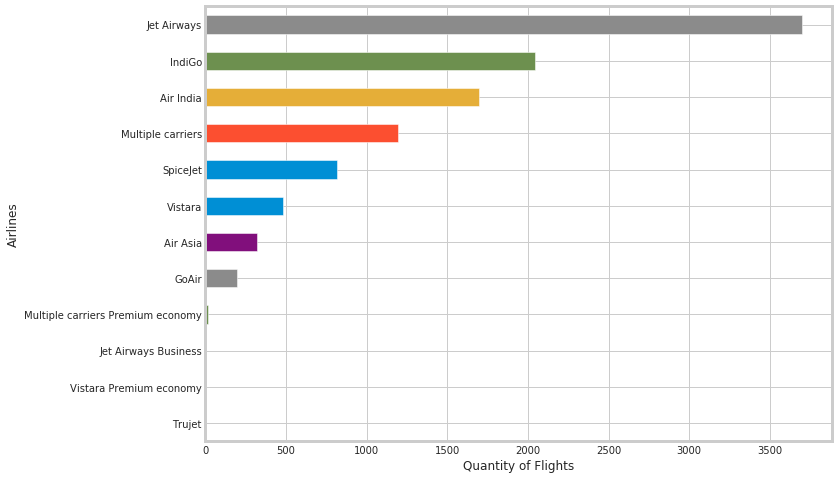

In [62]:
fig, ax = plt.subplots(figsize=(10,8))

#ax.set_title('Quantity of Flights', fontdict={'size':22})
ax.set(ylabel='Airlines', ylim=(0, 30))
ax.set(xlabel='Quantity of Flights', ylim=(0, 30))

df_train['Airline'].value_counts().sort_values().plot(kind = 'barh')

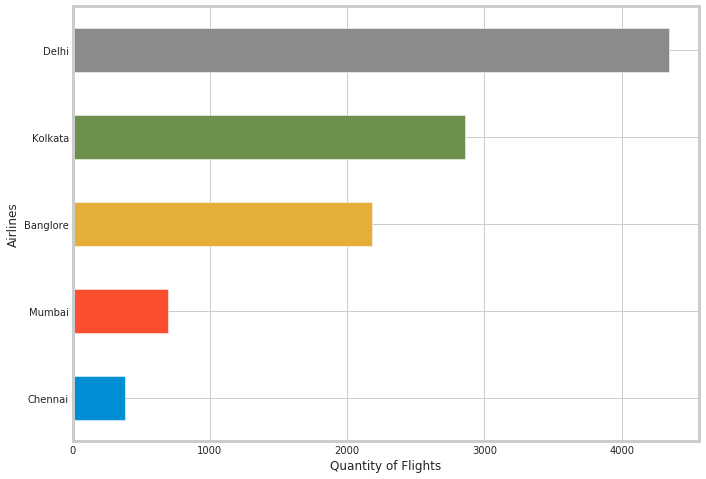

In [63]:
fig, ax = plt.subplots(figsize=(10,8))

#ax.set_title('Quantity of Flights', fontdict={'size':22})
ax.set(ylabel='Airlines', ylim=(0, 30))
ax.set(xlabel='Quantity of Flights', ylim=(0, 30))

df_train['Source'].value_counts().sort_values().plot(kind = 'barh')

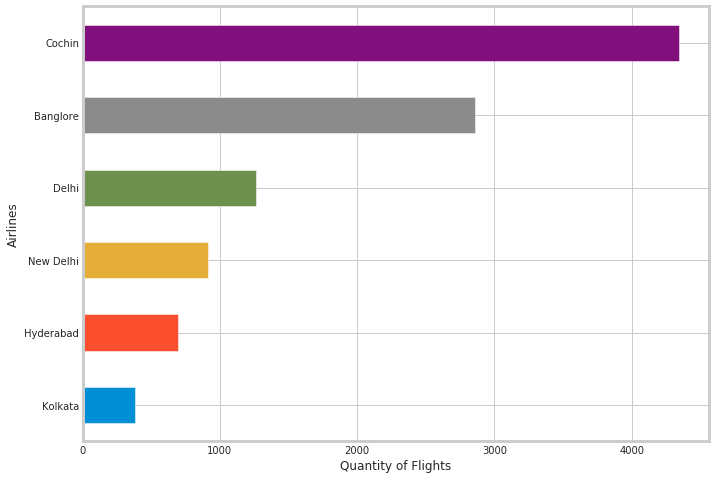

In [64]:
fig, ax = plt.subplots(figsize=(10,8))

#ax.set_title('Quantity of Flights', fontdict={'size':22})
ax.set(ylabel='Airlines', ylim=(0, 30))
ax.set(xlabel='Quantity of Flights', ylim=(0, 30))

df_train['Destination'].value_counts().sort_values().plot(kind = 'barh')

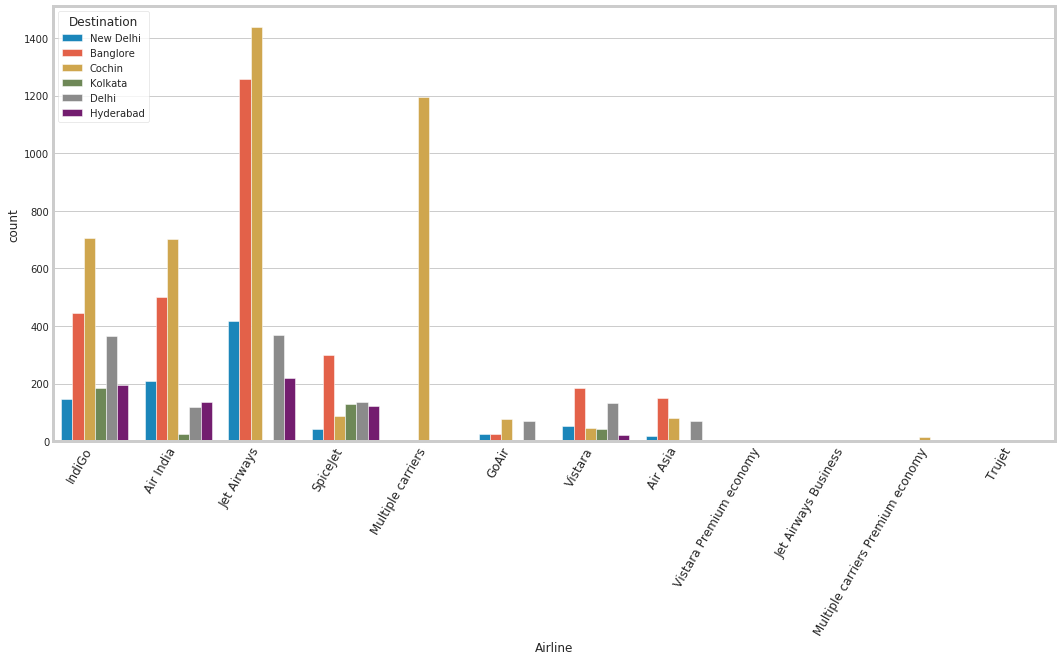

In [65]:
fig, ax = plt.subplots(figsize=(16,8))

plt.xticks(df_train.index, df_train['Airline'].str.upper(), rotation=60, horizontalalignment='right', fontsize=12)

sns.countplot(x="Airline", hue="Destination", data=df_train)

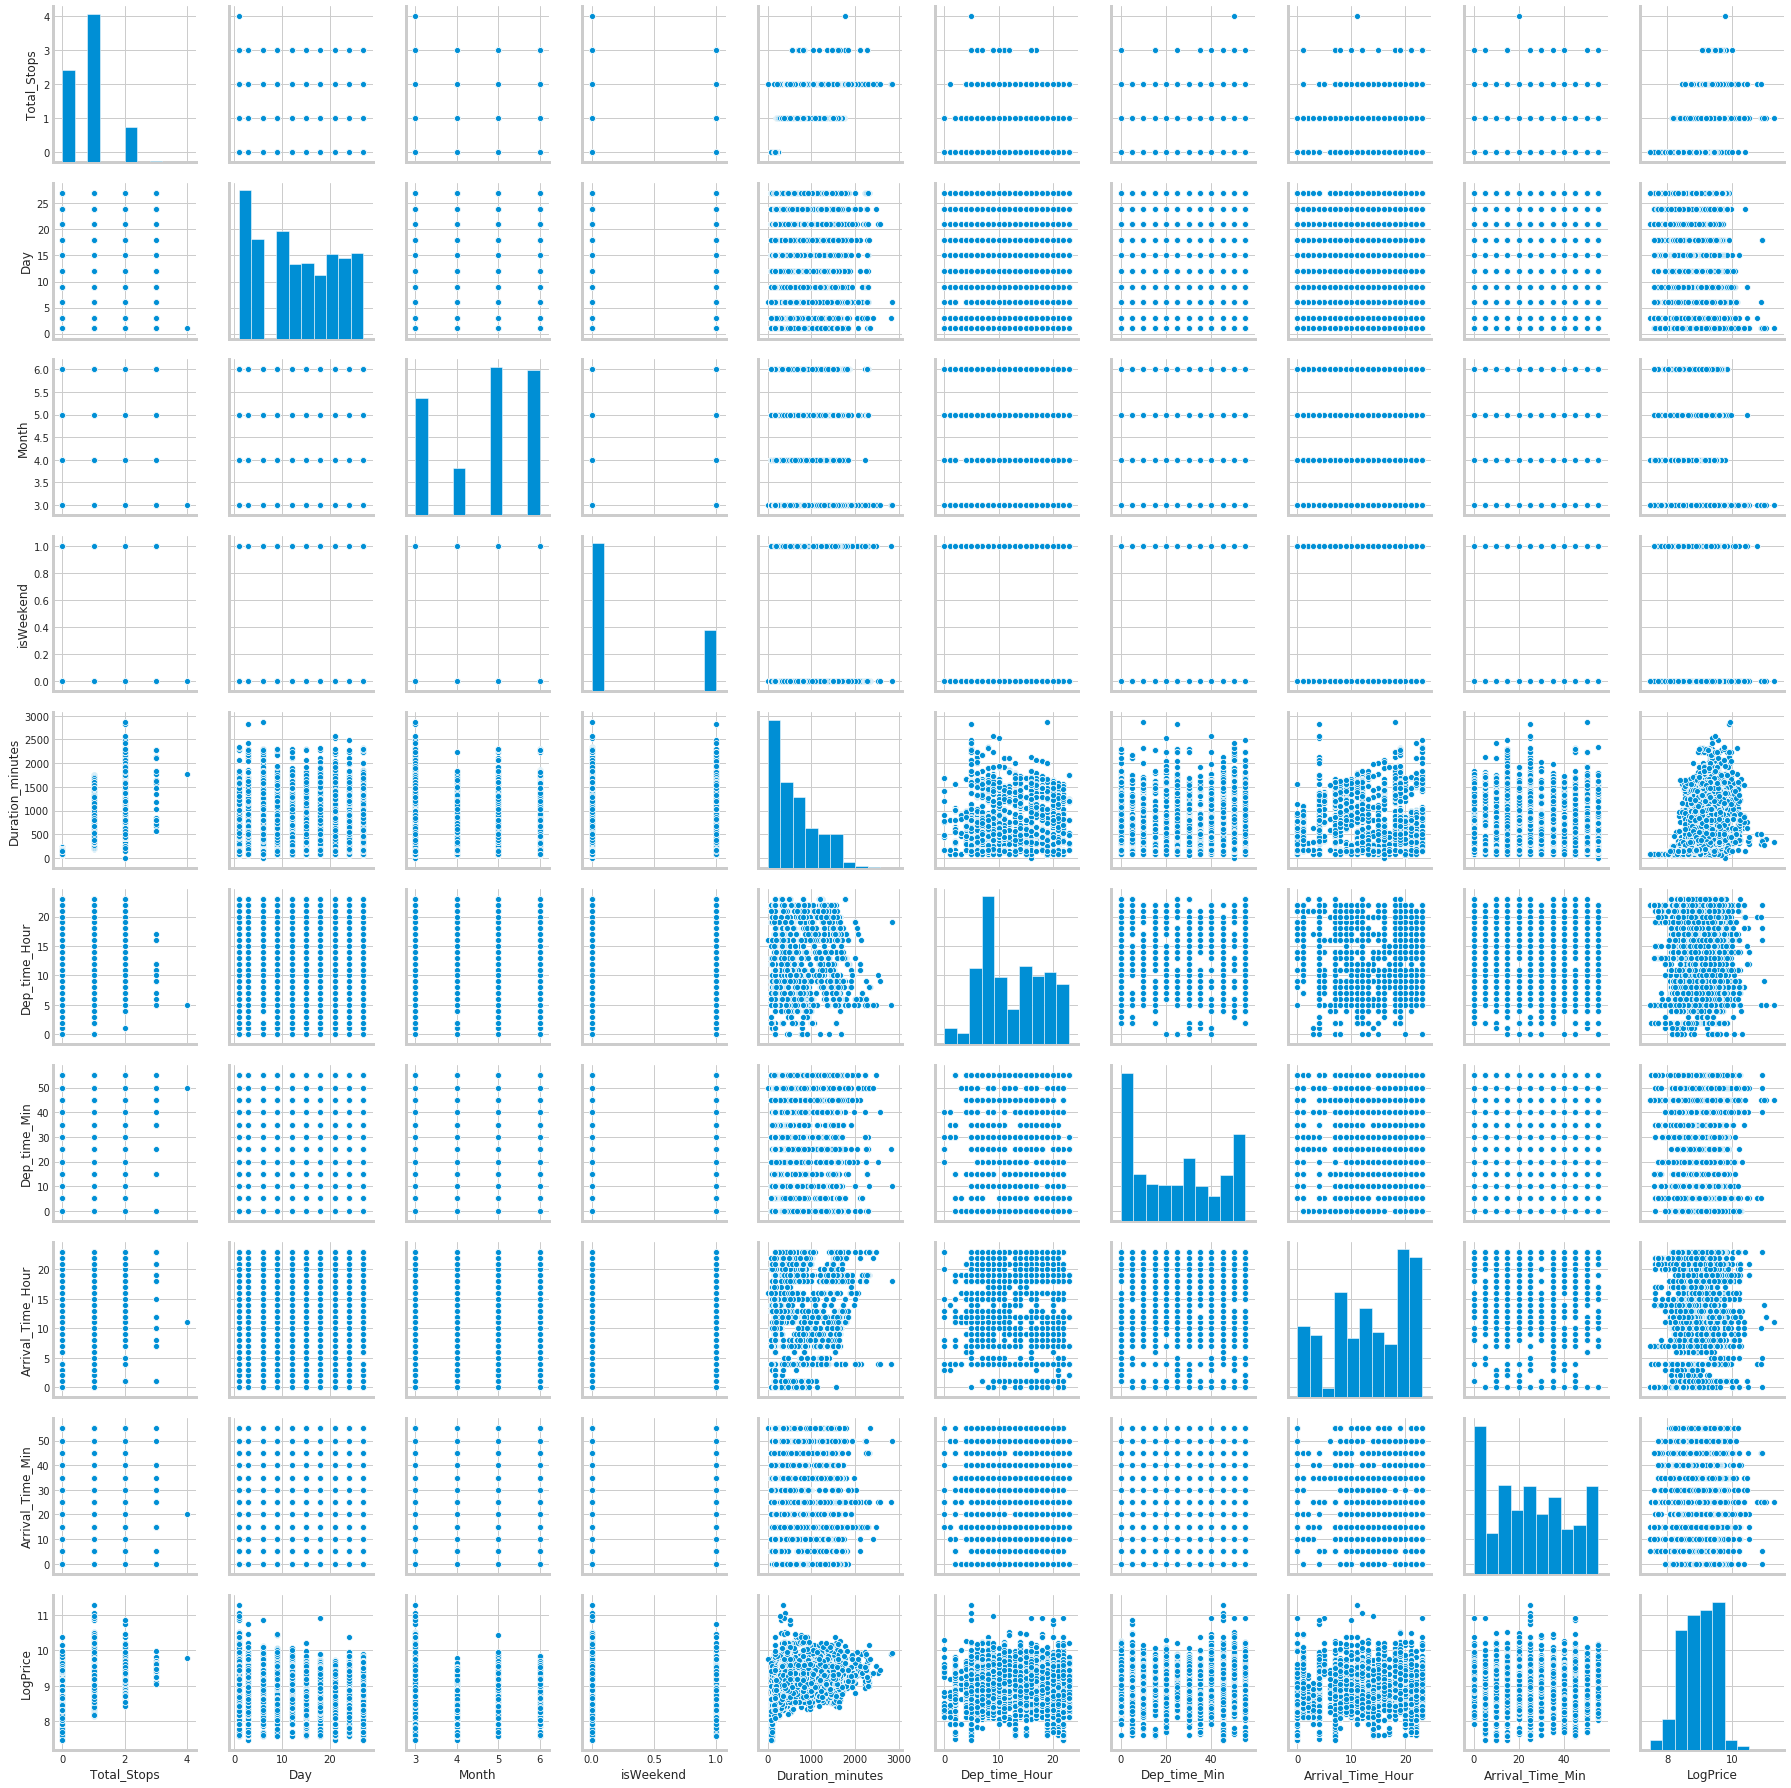

In [66]:
sns.pairplot(df_train)

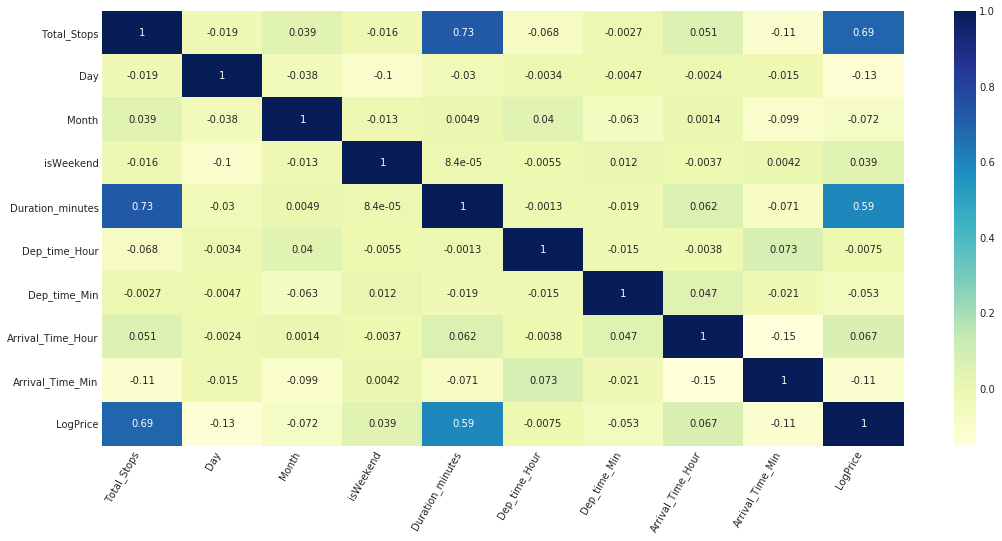

In [67]:
corr = df_train.corr()

fig, ax = plt.subplots(figsize=(16,8))

ax.set_xticklabels(df_train.columns, rotation=60, horizontalalignment='right')
g = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu", annot=True)
plt.show()

In [0]:
y = np.log1p(df_train["LogPrice"])
X = df_train.drop(["LogPrice"], axis=1)

predict = df_test

In [0]:
X_categorical = X.select_dtypes(exclude=['int', 'float'])
X_numerical = X.select_dtypes(include=['int', 'float'])

predict_categorical = predict.select_dtypes(exclude=['int', 'float'])
predict_numerical = predict.select_dtypes(include=['int', 'float'])

In [70]:
X_numerical_graph = X_numerical.copy()
X_categorical_graph = X_categorical.copy()
X_categorical.head(2)

,Airline,Source,Destination,Route,Additional_Info,DayName
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,Sunday
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,Wednesday


In [71]:
X_numerical.head(2)

,Total_Stops,Day,Month,isWeekend,Duration_minutes,Dep_time_Hour,Dep_time_Min,Arrival_Time_Hour,Arrival_Time_Min
0,0,24,3,1,170,22,20,1,10
1,2,1,5,0,445,5,50,13,15


In [0]:
'''X_categorical = pd.get_dummies(X_categorical, drop_first=True)
predict_categorical = pd.get_dummies(predict_categorical, drop_first=True)'''

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_categorical = X_categorical.apply(LabelEncoder().fit_transform)
predict_categorical = predict_categorical.apply(LabelEncoder().fit_transform)

In [73]:
from scipy.stats import skew
skewed_feats = X_numerical.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))


Skew in numerical features: 

There are 9 skewed numerical features to Box Cox transform
